<a href="https://colab.research.google.com/github/vsjamwal/Algo-trading-Strategies-/blob/main/volume_breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for HDFCBANK.NS: [Timestamp('2023-11-07 00:00:00'), Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-28 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-04 00:00:00'), Timestamp('2023-12-08 00:00:00')]


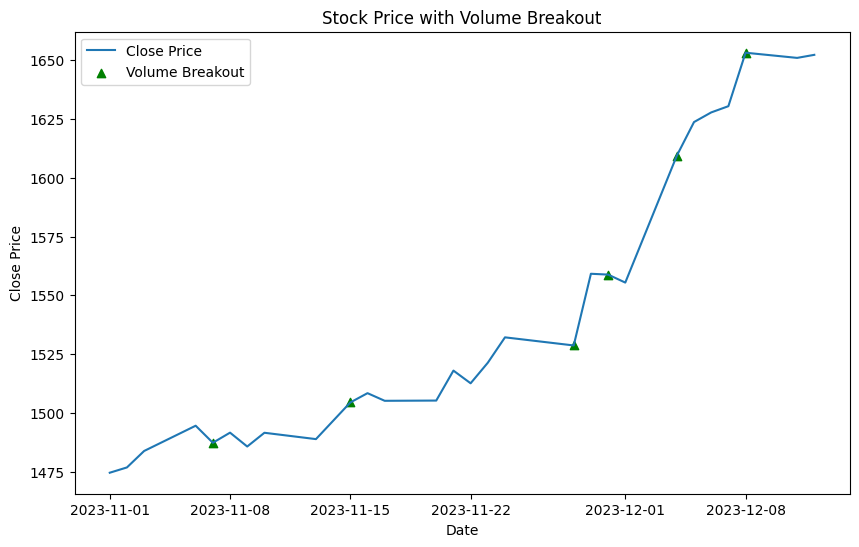

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for BAJAJ-AUTO.NS: [Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-17 00:00:00'), Timestamp('2023-11-23 00:00:00'), Timestamp('2023-12-05 00:00:00')]


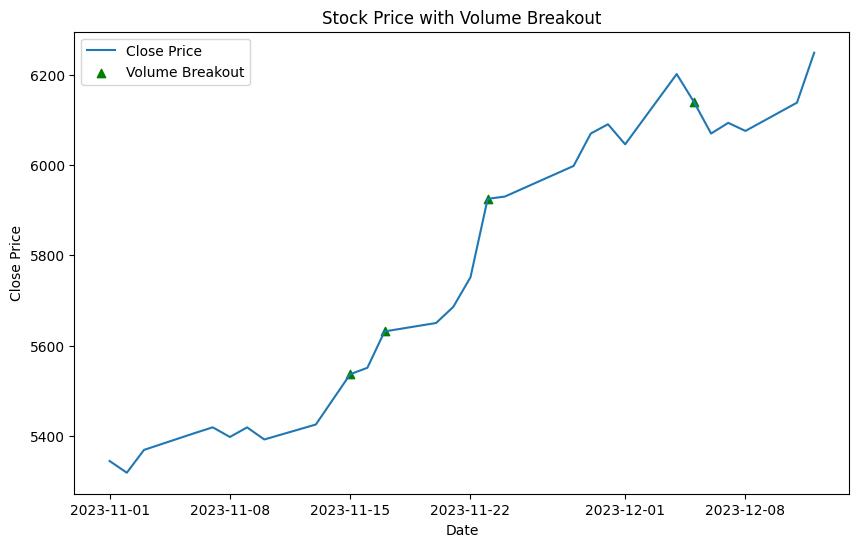

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for RELIANCE.NS: [Timestamp('2023-11-09 00:00:00'), Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-21 00:00:00'), Timestamp('2023-11-28 00:00:00'), Timestamp('2023-11-30 00:00:00')]


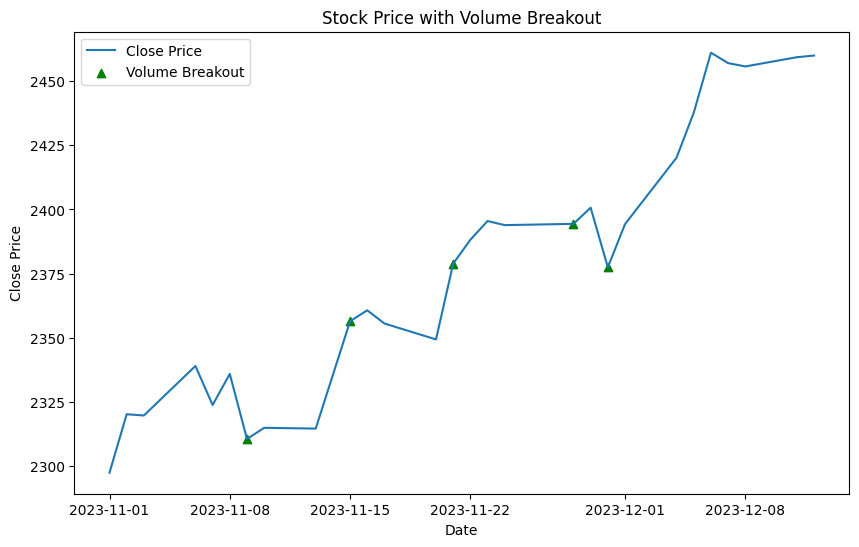

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for ICICIBANK.NS: [Timestamp('2023-11-07 00:00:00'), Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-28 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-04 00:00:00')]


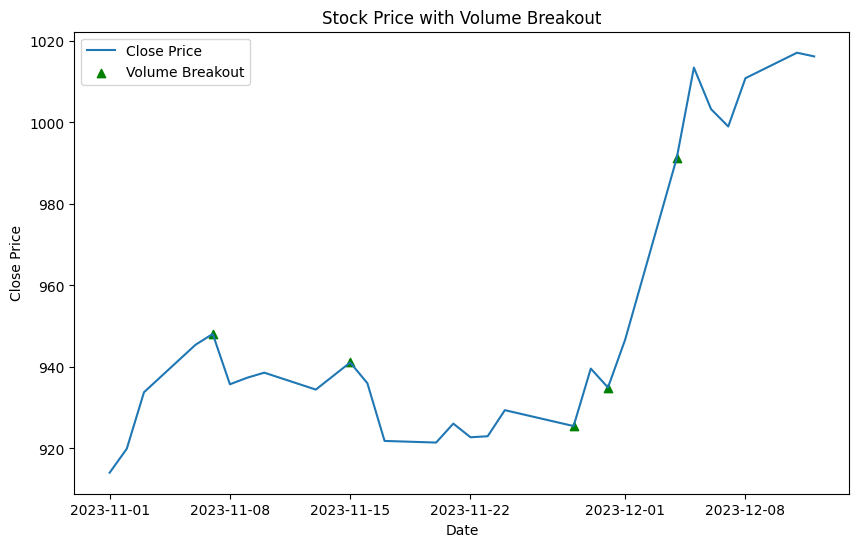

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for NTPC.NS: [Timestamp('2023-11-13 00:00:00'), Timestamp('2023-11-16 00:00:00'), Timestamp('2023-11-23 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-07 00:00:00')]


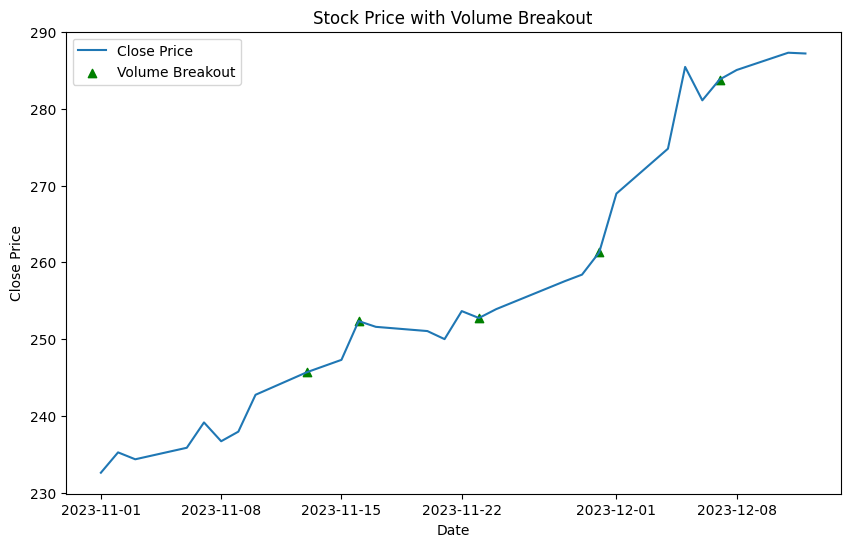

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for RECLTD.NS: [Timestamp('2023-11-02 00:00:00'), Timestamp('2023-11-07 00:00:00'), Timestamp('2023-11-09 00:00:00'), Timestamp('2023-11-13 00:00:00'), Timestamp('2023-11-21 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-08 00:00:00')]


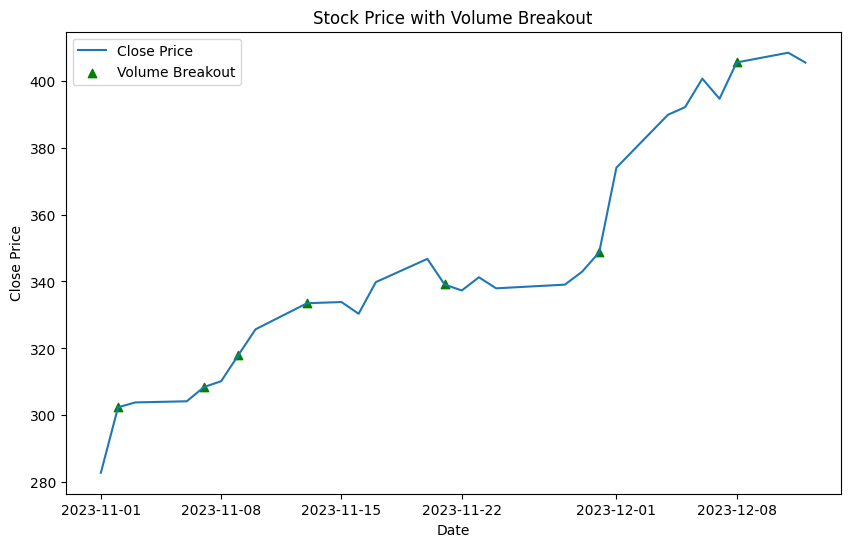

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for BHARTIARTL.NS: [Timestamp('2023-11-09 00:00:00'), Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-28 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-07 00:00:00')]


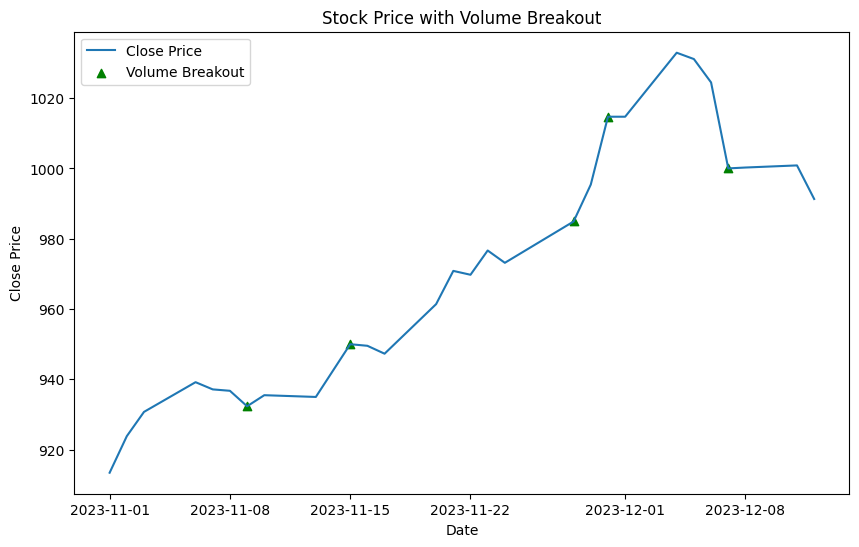

[*********************100%%**********************]  1 of 1 completed
Volume breakout dates for LT.NS: [Timestamp('2023-11-09 00:00:00'), Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-21 00:00:00'), Timestamp('2023-11-30 00:00:00')]


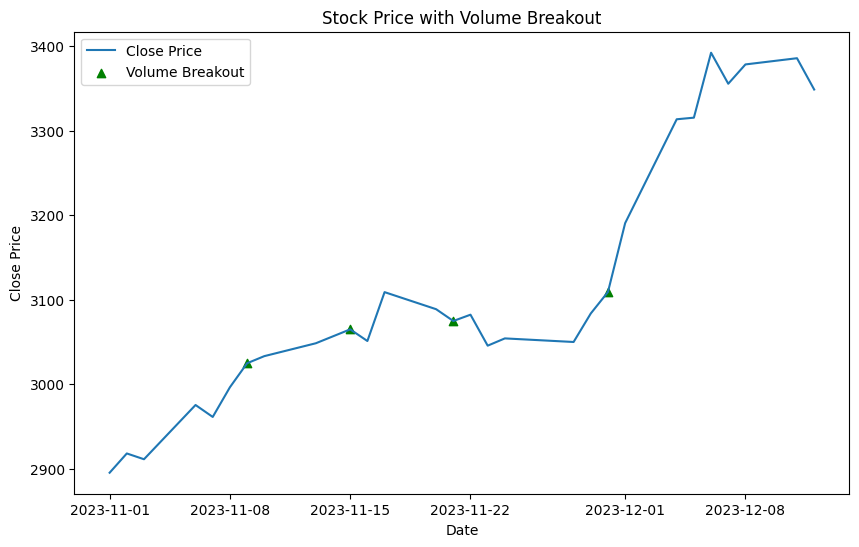

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date, interval):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

def generate_volume_breakout(stock_data, volume_threshold):
    breakout_dates = []
    for i in range(1, len(stock_data)):
        current_volume = stock_data['Volume'][i]
        previous_volume = stock_data['Volume'][i - 1]

        if current_volume > volume_threshold * previous_volume:
            breakout_dates.append(stock_data.index[i])

    return breakout_dates

def plot_volume_breakout(stock_data, breakout_dates):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.scatter(breakout_dates, stock_data.loc[breakout_dates]['Close'], marker='^', color='g', label='Volume Breakout')
    plt.title('Stock Price with Volume Breakout')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

def main():
    tickers = ['HDFCBANK.NS', 'BAJAJ-AUTO.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'NTPC.NS', 'RECLTD.NS', 'BHARTIARTL.NS', 'LT.NS']  # Add more tickers as needed
    start_date = '2023-11-01'
    end_date = '2023-12-31'
    interval = '1d'
    volume_threshold = 1.5  # Adjust this threshold as needed

    for ticker in tickers:
        stock_data = get_stock_data(ticker, start_date, end_date, interval)
        breakout_dates = generate_volume_breakout(stock_data, volume_threshold)

        if breakout_dates:
            print(f"Volume breakout dates for {ticker}: {breakout_dates}")
            plot_volume_breakout(stock_data, breakout_dates)
        else:
            print(f"No volume breakout found for {ticker}")

if __name__ == "__main__":
    main()
